## Road Centerlines Event and No Traffic

Import and get directory

In [2]:
import arcpy
import os
import re
from datetime import datetime
#Get current directory
file_path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(file_path)
#Path for gdb
arcpy.env.workspace = file_path


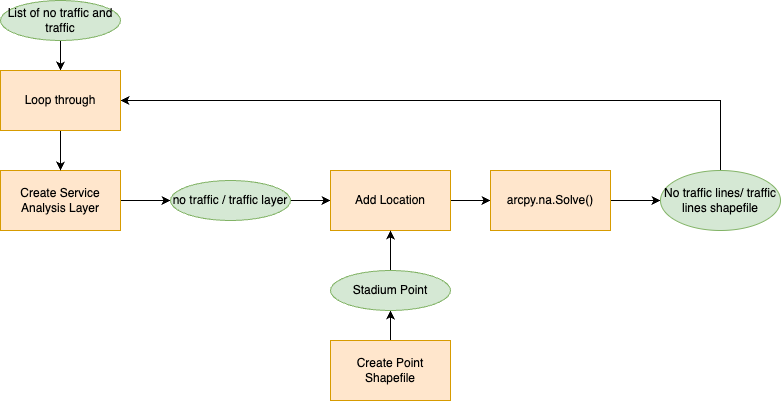
Credits: chat.openai.com

In [5]:
#Define the location for the analysis
facility = (-93.2265955, 44.9754918) #Near stadiums

# Name of the new shapefile
shapefile = "Stadiums.shp"

#Set spatial reference
spatial_ref = arcpy.SpatialReference(4326)

# Create the point shapefile
dest_point = arcpy.CreateFeatureclass_management(arcpy.env.workspace, shapefile, "POINT", spatial_reference=spatial_ref)

# Create a new insert cursor for adding features to the shapefile
with arcpy.da.InsertCursor(shapefile, ["SHAPE@XY"]) as cursor:
    #Add the facility point
    cursor.insertRow([facility])

#### Create list of tuples that contain Sport Info

In [3]:
import os
import csv
import re
from datetime import datetime

# Path to the CSV file
csv_file = os.path.join(arcpy.env.workspace, "qaqc_schedule.csv")

# Initialize the list
sport_info = []

# Read the CSV file and populate the list
with open(csv_file, "r", newline="") as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Parse date and time strings from the CSV using strptime()
        date = datetime.strptime(row["Date"], '%m/%d/%Y').strftime('%m/%d/%Y')
        # Adjust format string to handle '8:00 PM' format
        time_format = '%I:%M %p'
        time = datetime.strptime(row["Time"], time_format).strftime('%I:%M:%S %p')
        season = re.sub(r'\s+', '', row["Season"])
        
        # Construct tuple
        entry = (date, time, season)
        
        # Append the tuple to the list
        sport_info.append(entry)

# Print the constructed list
print(sport_info)


[('01/06/2013', '06:00:00 PM', 'Basketball'), ('01/17/2013', '06:00:00 PM', 'Basketball'), ('01/29/2013', '08:00:00 PM', 'Basketball'), ('02/03/2013', '12:00:00 PM', 'Basketball'), ('02/10/2013', '05:00:00 PM', 'Basketball'), ('02/14/2013', '06:00:00 PM', 'Basketball'), ('02/26/2013', '06:00:00 PM', 'Basketball'), ('03/02/2013', '02:00:00 PM', 'Basketball'), ('11/01/2013', '07:00:00 PM', 'Basketball'), ('11/04/2013', '07:00:00 PM', 'Basketball'), ('11/08/2013', '07:00:00 PM', 'Basketball'), ('11/12/2013', '07:00:00 PM', 'Basketball'), ('11/19/2013', '07:00:00 PM', 'Basketball'), ('11/21/2013', '06:00:00 PM', 'Basketball'), ('12/03/2013', '08:30:00 PM', 'Basketball'), ('12/07/2013', '02:00:00 PM', 'Basketball'), ('12/10/2013', '07:00:00 PM', 'Basketball'), ('12/20/2013', '08:00:00 PM', 'Basketball'), ('12/28/2013', '07:30:00 PM', 'Basketball'), ('01/02/2014', '06:00:00 PM', 'Basketball'), ('01/05/2014', '01:30:00 PM', 'Basketball'), ('01/16/2014', '08:00:00 PM', 'Basketball'), ('01/22/2

In [6]:
# List of date/times
sportlist = sport_info   
# Continue with the rest of the script
for event in sportlist:
    if event[2] == 'Hockey'
    # Retrieve traffic information for the current date/time from the dictionary
    date_string = re.sub(r'/', '', event[0])
    time_string = re.sub(r'[:,\s]', '', event[1])
    name = f"{date_string}_{time_string}_{event[2]}"
    if not event:
        # Handle cases where the date/time is not found in the dictionary
        print(f"No traffic information found for date/time: {time}")
        continue

    # Make Service Area Analysis Layer
    layer = arcpy.na.MakeServiceAreaAnalysisLayer(
        network_data_source="https://www.arcgis.com/",
        layer_name=name,
        travel_mode="Driving Time",
        travel_direction="TO_FACILITIES",
        cutoffs=[10],
        time_of_day=f"{event[0]} {event[1]}",
        time_zone="LOCAL_TIME_AT_LOCATIONS",
        output_type="LINES",
        polygon_detail="STANDARD",
        geometry_at_overlaps="OVERLAP",
        geometry_at_cutoffs="RINGS",
        polygon_trim_distance="100 Meters",
        exclude_sources_from_polygon_generation=None,
        accumulate_attributes=None,
        ignore_invalid_locations="SKIP"
    ).getOutput(0)

    # Adding location to the layer
    arcpy.na.AddLocations(
        in_network_analysis_layer=layer,
        sub_layer="Facilities",
        in_table=dest_point,
        field_mappings="Name # #;CurbApproach # 0;Attr_Minutes # 0;Attr_TravelTime # 0;Attr_Miles # 0;Attr_Kilometers # 0;Attr_TimeAt1KPH # 0;Attr_WalkTime # 0;Attr_TruckMinutes # 0;Attr_TruckTravelTime # 0;Breaks_Minutes # #;Breaks_TravelTime # #;Breaks_Miles # #;Breaks_Kilometers # #;Breaks_TimeAt1KPH # #;Breaks_WalkTime # #;Breaks_TruckMinutes # #;Breaks_TruckTravelTime # #",
        search_tolerance="20000 Meters",
        sort_field=None,
        search_criteria="main.Routing_Streets SHAPE",
        match_type="MATCH_TO_CLOSEST",
        append="APPEND",
        snap_to_position_along_network="NO_SNAP",
        snap_offset="5 Meters",
        exclude_restricted_elements="EXCLUDE",
        search_query=None,
        allow_auto_relocate="ALLOW"
    )
    
    arcpy.na.Solve(layer)
    
    out = os.path.join(arcpy.env.workspace, f"{name}.shp")
    
    sublayer = arcpy.na.GetNASublayer(layer, "SALines")
    arcpy.management.CopyFeatures(sublayer, out)
    print(f"{name} at {datetime.now()}")
    

01062013_060000PM_Basketball at 2024-03-23 11:33:23.240562
01172013_060000PM_Basketball at 2024-03-23 11:33:52.906628
01292013_080000PM_Basketball at 2024-03-23 11:34:26.455585
02032013_120000PM_Basketball at 2024-03-23 11:34:58.661330
02102013_050000PM_Basketball at 2024-03-23 11:35:29.194200
02142013_060000PM_Basketball at 2024-03-23 11:35:57.235162
02262013_060000PM_Basketball at 2024-03-23 11:36:28.032479
03022013_020000PM_Basketball at 2024-03-23 11:36:58.320406
11012013_070000PM_Basketball at 2024-03-23 11:37:25.164151
11042013_070000PM_Basketball at 2024-03-23 11:37:55.128979
11082013_070000PM_Basketball at 2024-03-23 11:38:21.581951
11122013_070000PM_Basketball at 2024-03-23 11:38:52.403986
11192013_070000PM_Basketball at 2024-03-23 11:39:22.292514
11212013_060000PM_Basketball at 2024-03-23 11:39:48.978016
12032013_083000PM_Basketball at 2024-03-23 11:40:21.438421
12072013_020000PM_Basketball at 2024-03-23 11:40:49.021745
12102013_070000PM_Basketball at 2024-03-23 11:41:19.4748

ExecuteError: ERROR 999999: Something unexpected caused the tool to fail. Contact Esri Technical Support (http://esriurl.com/support) to Report a Bug, and refer to the error help for potential solutions or workarounds.
FDO error: -2147024893 [PolygonBarriersr7zoqa]
File read/write error occurred. [\\Mac\Home\Documents\ArcGIS\Projects\MyProject1\scratch.gdb\a00000003.gdbtable]
Workspace or data source is read only.
Workspace or data source is read only.
Workspace or data source is read only.
Workspace or data source is read only.
Workspace or data source is read only.
Failed to execute (MakeServiceAreaAnalysisLayer).


In [ ]:
# List of date/times
sportlist = sport_info   
# Continue with the rest of the script
for event in sportlist:
    if event[2] == 'Hockey':
        # Retrieve traffic information for the current date/time from the dictionary
        date_string = re.sub(r'/', '', event[0])
        time_string = re.sub(r'[:,\s]', '', event[1])
        name = f"{date_string}_{time_string}_{event[2]}"
        if not event:
            # Handle cases where the date/time is not found in the dictionary
            print(f"No traffic information found for date/time: {time}")
            continue

        # Make Service Area Analysis Layer
        layer = arcpy.na.MakeServiceAreaAnalysisLayer(
            network_data_source="https://www.arcgis.com/",
            layer_name=name,
            travel_mode="Driving Time",
            travel_direction="TO_FACILITIES",
            cutoffs=[10],
            time_of_day=f"{event[0]} {event[1]}",
            time_zone="LOCAL_TIME_AT_LOCATIONS",
            output_type="LINES",
            polygon_detail="STANDARD",
            geometry_at_overlaps="OVERLAP",
            geometry_at_cutoffs="RINGS",
            polygon_trim_distance="100 Meters",
            exclude_sources_from_polygon_generation=None,
            accumulate_attributes=None,
            ignore_invalid_locations="SKIP"
        ).getOutput(0)

        # Adding location to the layer
        arcpy.na.AddLocations(
            in_network_analysis_layer=layer,
            sub_layer="Facilities",
            in_table=dest_point,
            field_mappings="Name # #;CurbApproach # 0;Attr_Minutes # 0;Attr_TravelTime # 0;Attr_Miles # 0;Attr_Kilometers # 0;Attr_TimeAt1KPH # 0;Attr_WalkTime # 0;Attr_TruckMinutes # 0;Attr_TruckTravelTime # 0;Breaks_Minutes # #;Breaks_TravelTime # #;Breaks_Miles # #;Breaks_Kilometers # #;Breaks_TimeAt1KPH # #;Breaks_WalkTime # #;Breaks_TruckMinutes # #;Breaks_TruckTravelTime # #",
            search_tolerance="20000 Meters",
            sort_field=None,
            search_criteria="main.Routing_Streets SHAPE",
            match_type="MATCH_TO_CLOSEST",
            append="APPEND",
            snap_to_position_along_network="NO_SNAP",
            snap_offset="5 Meters",
            exclude_restricted_elements="EXCLUDE",
            search_query=None,
            allow_auto_relocate="ALLOW"
        )

        arcpy.na.Solve(layer)

        out = os.path.join(arcpy.env.workspace, f"{name}.shp")

        sublayer = arcpy.na.GetNASublayer(layer, "SALines")
        arcpy.management.CopyFeatures(sublayer, out)
        print(f"{name} at {datetime.now()}")
    

01082013_070000PM_Hockey at 2024-03-23 13:43:02.938926
01112013_080000PM_Hockey at 2024-03-23 13:43:32.274155
01122013_070000PM_Hockey at 2024-03-23 13:44:02.346734
01182013_070000PM_Hockey at 2024-03-23 13:44:33.654696
01192013_050000PM_Hockey at 2024-03-23 13:45:05.708870
01252013_070000PM_Hockey at 2024-03-23 13:45:38.218886
02222013_070000PM_Hockey at 2024-03-23 13:46:08.462264
02232013_070000PM_Hockey at 2024-03-23 13:46:39.764716
03012013_070000PM_Hockey at 2024-03-23 13:47:09.023898
03022013_070000PM_Hockey at 2024-03-23 13:47:38.360415
03152013_070000PM_Hockey at 2024-03-23 13:48:15.098041
03162013_070000PM_Hockey at 2024-03-23 13:48:44.912294
10052013_070000PM_Hockey at 2024-03-23 13:49:14.301319
10112013_070000PM_Hockey at 2024-03-23 13:49:42.884210
10122013_070000PM_Hockey at 2024-03-23 13:50:12.541095
10252013_070000PM_Hockey at 2024-03-23 13:50:41.493718
10272013_010000PM_Hockey at 2024-03-23 13:51:16.610136
11152013_070000PM_Hockey at 2024-03-23 13:51:46.406177
11162013_0